In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\10pai\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("../Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = df[['koi_period', 'koi_impact', 'koi_duration', 'koi_prad', 'koi_teq', 'koi_steff', 'koi_slogg']]
X_names = X.columns

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
#Select column for dependent variable (y)
y = df["koi_disposition"]
y_names = df.koi_disposition.unique()
y_names.sort()
print(y_names)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


In [7]:
#Split the data into train/test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X.shape, y.shape)

(6991, 7) (6991,)


In [8]:
X_train.head()

,koi_period,koi_impact,koi_duration,koi_prad,koi_teq,koi_steff,koi_slogg
809,4.167878,0.1680,2.2136,1.07,962,5251,4.541
5261,143.096880,0.1129,17.7400,1.48,441,6725,4.335
6101,0.926240,0.0580,1.2670,1.16,1208,4494,4.692
3031,94.180473,0.9550,7.3450,4.17,478,6997,4.475
5832,0.509483,0.3535,3.1400,1.22,3024,6344,4.091


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# YOUR CODE HERE
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    train_score = knn_model.score(X_train_scaled, y_train)
    test_score = knn_model.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.543
k: 3, Train/Test Score: 0.773/0.570
k: 5, Train/Test Score: 0.722/0.578
k: 7, Train/Test Score: 0.696/0.592
k: 9, Train/Test Score: 0.684/0.604
k: 11, Train/Test Score: 0.674/0.597
k: 13, Train/Test Score: 0.671/0.596
k: 15, Train/Test Score: 0.664/0.607
k: 17, Train/Test Score: 0.663/0.606
k: 19, Train/Test Score: 0.658/0.608


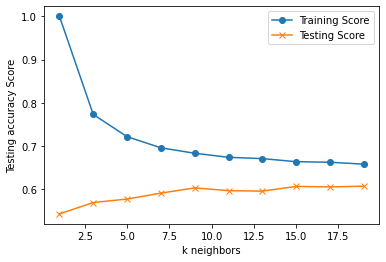

In [12]:
# Plot the training accuracy and testing accuracy at different k values    
plt.plot(range(1, 20, 2), train_scores, marker='o',  label="Training Score")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="Testing Score")
plt.legend()
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
# YOUR CODE HERE
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn_model.score(X_test_scaled, y_test))

k=9 Test Acc: 0.604


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [14]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9],
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(knn_model, param_grid, verbose=3)
print(knn_model.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [15]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.589, total=   0.1s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.573, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.597, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.560, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.568, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.592, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.587, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.599, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.576, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.578, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.598, to

[CV]  metric=manhattan, n_neighbors=5, weights=distance, score=0.581, total=   0.0s
[CV] metric=manhattan, n_neighbors=5, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=5, weights=distance, score=0.587, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.617, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.608, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.601, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.586, total=   0.0s
[CV] metric=manhattan, n_neighbors=7, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=7, weights=uniform, score=0.575, total

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.5s finished


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [16]:
#Print best params and their score
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.6137661094899541


In [17]:
#Make predictions
predictions = knn_model.predict(X_test_scaled)
predictions

array(['CONFIRMED', 'FALSE POSITIVE', 'CONFIRMED', ..., 'CANDIDATE',
       'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [18]:
#Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names = y_names))

                precision    recall  f1-score   support

     CANDIDATE       0.36      0.28      0.32       421
     CONFIRMED       0.52      0.62      0.57       456
FALSE POSITIVE       0.74      0.75      0.75       871

      accuracy                           0.60      1748
     macro avg       0.54      0.55      0.54      1748
  weighted avg       0.59      0.60      0.60      1748



# Save the Model

In [19]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'AJP.sav'
joblib.dump(knn_model, filename)

['AJP.sav']